## K 겹 교차 검증
- Train_Test 의 단점 개선
    - 데이터셋을 여러개로 나누어 하나씩 테스트 셋으로 사용,
    - 나머지를 모두 합하여 학습셋으로 사용
    - 그 결과를 모두 합해서 학습셋으로 사용
    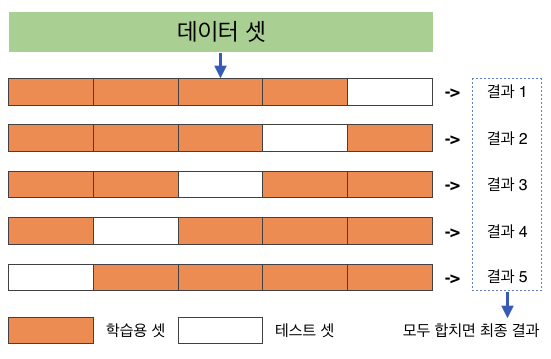

# StratifiedKFold()
#### 데이터를 원하는 숫자만큼 쪼개 각각 학습셋과 테스트셋으로 사용하게 하는 함수

from sklearn.model_selection import StratifiedKFold
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# seed 값 설정
seed=0
np.random.seed(seed)
tf.set_random_seed(seed)

df=pd.read_csv('./dataset/sonar.csv', header=None)

dataset = df.values
X = dataset[:,:60]
Y_obj = dataset[:, 60]

# 클래스 One-hot encoding
e=LabelEncoder()
e.fit(Y_obj)
Y= e.transform(Y_obj)

# 10개의 파일로 꺼냄
n_fold= 10
skf=StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

# 빈 accuracy 배열
accuracy =[]

# 모델 설정, 컴파일 실행
for train, test in skf.split(X,Y):
    model=Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5)
    k_accuracy = '%.4f'%(model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)
    
# 결과 출력
print('=n %.f fold accuracy : '% n_fold, accuracy)
    

Train on 187 samples
Epoch 1/100
187/187 [==============================] - 0s 573us/sample - loss: 0.2488 - acc: 0.5401
Epoch 2/100
187/187 [==============================] - 0s 193us/sample - loss: 0.2349 - acc: 0.6364
Epoch 3/100
187/187 [==============================] - 0s 214us/sample - loss: 0.2241 - acc: 0.6791
Epoch 4/100
187/187 [==============================] - 0s 193us/sample - loss: 0.2158 - acc: 0.6738
Epoch 5/100
187/187 [==============================] - 0s 198us/sample - loss: 0.2035 - acc: 0.7166
Epoch 6/100
187/187 [==============================] - 0s 198us/sample - loss: 0.1958 - acc: 0.7166
Epoch 7/100
187/187 [==============================] - 0s 193us/sample - loss: 0.1858 - acc: 0.7326
Epoch 8/100
187/187 [==============================] - 0s 209us/sample - loss: 0.1759 - acc: 0.7807
Epoch 9/100
187/187 [==============================] - 0s 193us/sample - loss: 0.1755 - acc: 0.7326
Epoch 10/100
187/187 [==============================] - 0s 203us/sample - loss:

Epoch 82/100
187/187 [==============================] - 0s 193us/sample - loss: 0.0175 - acc: 0.9947
Epoch 83/100
187/187 [==============================] - 0s 198us/sample - loss: 0.0202 - acc: 0.9893
Epoch 84/100
187/187 [==============================] - 0s 203us/sample - loss: 0.0168 - acc: 0.9893
Epoch 85/100
187/187 [==============================] - 0s 193us/sample - loss: 0.0163 - acc: 0.9947
Epoch 86/100
187/187 [==============================] - 0s 198us/sample - loss: 0.0171 - acc: 0.9947
Epoch 87/100
187/187 [==============================] - 0s 198us/sample - loss: 0.0165 - acc: 0.9947
Epoch 88/100
187/187 [==============================] - 0s 198us/sample - loss: 0.0145 - acc: 0.9947
Epoch 89/100
187/187 [==============================] - 0s 193us/sample - loss: 0.0149 - acc: 0.9947
Epoch 90/100
187/187 [==============================] - 0s 219us/sample - loss: 0.0135 - acc: 0.9947
Epoch 91/100
187/187 [==============================] - 0s 193us/sample - loss: 0.0151 - ac

D:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 187 samples
Epoch 1/100
187/187 [==============================] - 0s 589us/sample - loss: 0.2523 - acc: 0.5027
Epoch 2/100
187/187 [==============================] - 0s 193us/sample - loss: 0.2422 - acc: 0.5668
Epoch 3/100
187/187 [==============================] - 0s 219us/sample - loss: 0.2368 - acc: 0.5936
Epoch 4/100
187/187 [==============================] - 0s 203us/sample - loss: 0.2267 - acc: 0.6043
Epoch 5/100
187/187 [==============================] - 0s 198us/sample - loss: 0.2164 - acc: 0.6952
Epoch 6/100
187/187 [==============================] - 0s 203us/sample - loss: 0.2056 - acc: 0.6952
Epoch 7/100
187/187 [==============================] - 0s 203us/sample - loss: 0.1938 - acc: 0.7380
Epoch 8/100
187/187 [==============================] - 0s 198us/sample - loss: 0.1837 - acc: 0.7647
Epoch 9/100
187/187 [==============================] - 0s 198us/sample - loss: 0.1746 - acc: 0.7807
Epoch 10/100
187/187 [==============================] - 0s 198us/sample - loss:

Epoch 82/100
187/187 [==============================] - 0s 198us/sample - loss: 0.0345 - acc: 0.9786
Epoch 83/100
187/187 [==============================] - 0s 193us/sample - loss: 0.0329 - acc: 0.9786
Epoch 84/100
187/187 [==============================] - 0s 203us/sample - loss: 0.0312 - acc: 0.9786
Epoch 85/100
187/187 [==============================] - 0s 198us/sample - loss: 0.0274 - acc: 0.9840
Epoch 86/100
187/187 [==============================] - 0s 187us/sample - loss: 0.0288 - acc: 0.9786
Epoch 87/100
187/187 [==============================] - 0s 193us/sample - loss: 0.0276 - acc: 0.9840
Epoch 88/100
187/187 [==============================] - 0s 209us/sample - loss: 0.0291 - acc: 0.9840
Epoch 89/100
187/187 [==============================] - 0s 193us/sample - loss: 0.0275 - acc: 0.9840
Epoch 90/100
187/187 [==============================] - 0s 203us/sample - loss: 0.0258 - acc: 0.9893
Epoch 91/100
187/187 [==============================] - 0s 193us/sample - loss: 0.0242 - ac

Epoch 63/100
187/187 [==============================] - 0s 193us/sample - loss: 0.0350 - acc: 0.9786
Epoch 64/100
187/187 [==============================] - 0s 193us/sample - loss: 0.0358 - acc: 0.9733
Epoch 65/100
187/187 [==============================] - 0s 209us/sample - loss: 0.0320 - acc: 0.9786
Epoch 66/100
187/187 [==============================] - 0s 209us/sample - loss: 0.0352 - acc: 0.9679
Epoch 67/100
187/187 [==============================] - 0s 209us/sample - loss: 0.0322 - acc: 0.9786
Epoch 68/100
187/187 [==============================] - 0s 193us/sample - loss: 0.0300 - acc: 0.9840
Epoch 69/100
187/187 [==============================] - 0s 241us/sample - loss: 0.0312 - acc: 0.9679
Epoch 70/100
187/187 [==============================] - 0s 225us/sample - loss: 0.0296 - acc: 0.9786
Epoch 71/100
187/187 [==============================] - 0s 241us/sample - loss: 0.0292 - acc: 0.9786
Epoch 72/100
187/187 [==============================] - 0s 219us/sample - loss: 0.0291 - ac

Epoch 44/100
187/187 [==============================] - 0s 219us/sample - loss: 0.0636 - acc: 0.9412
Epoch 45/100
187/187 [==============================] - 0s 209us/sample - loss: 0.0670 - acc: 0.9091
Epoch 46/100
187/187 [==============================] - 0s 219us/sample - loss: 0.0626 - acc: 0.9519
Epoch 47/100
187/187 [==============================] - 0s 203us/sample - loss: 0.0633 - acc: 0.9251
Epoch 48/100
187/187 [==============================] - 0s 219us/sample - loss: 0.0593 - acc: 0.9412
Epoch 49/100
187/187 [==============================] - 0s 209us/sample - loss: 0.0565 - acc: 0.9305
Epoch 50/100
187/187 [==============================] - 0s 219us/sample - loss: 0.0627 - acc: 0.9144
Epoch 51/100
187/187 [==============================] - 0s 241us/sample - loss: 0.0586 - acc: 0.9358
Epoch 52/100
187/187 [==============================] - 0s 214us/sample - loss: 0.0546 - acc: 0.9412
Epoch 53/100
187/187 [==============================] - 0s 230us/sample - loss: 0.0518 - ac

Epoch 25/100
187/187 [==============================] - 0s 225us/sample - loss: 0.1165 - acc: 0.8610
Epoch 26/100
187/187 [==============================] - 0s 209us/sample - loss: 0.1124 - acc: 0.8503
Epoch 27/100
187/187 [==============================] - 0s 214us/sample - loss: 0.1139 - acc: 0.8663
Epoch 28/100
187/187 [==============================] - 0s 209us/sample - loss: 0.1096 - acc: 0.8663
Epoch 29/100
187/187 [==============================] - 0s 214us/sample - loss: 0.1123 - acc: 0.8503
Epoch 30/100
187/187 [==============================] - 0s 235us/sample - loss: 0.1054 - acc: 0.8663
Epoch 31/100
187/187 [==============================] - 0s 225us/sample - loss: 0.1084 - acc: 0.8503
Epoch 32/100
187/187 [==============================] - 0s 214us/sample - loss: 0.1085 - acc: 0.8503
Epoch 33/100
187/187 [==============================] - 0s 209us/sample - loss: 0.1025 - acc: 0.8877
Epoch 34/100
187/187 [==============================] - 0s 219us/sample - loss: 0.0995 - ac

Epoch 6/100
187/187 [==============================] - 0s 230us/sample - loss: 0.2132 - acc: 0.6952
Epoch 7/100
187/187 [==============================] - 0s 214us/sample - loss: 0.2035 - acc: 0.7112
Epoch 8/100
187/187 [==============================] - 0s 241us/sample - loss: 0.1893 - acc: 0.7433
Epoch 9/100
187/187 [==============================] - 0s 214us/sample - loss: 0.1775 - acc: 0.8182
Epoch 10/100
187/187 [==============================] - 0s 219us/sample - loss: 0.1676 - acc: 0.7807
Epoch 11/100
187/187 [==============================] - 0s 235us/sample - loss: 0.1571 - acc: 0.8182
Epoch 12/100
187/187 [==============================] - 0s 214us/sample - loss: 0.1490 - acc: 0.8021
Epoch 13/100
187/187 [==============================] - 0s 225us/sample - loss: 0.1464 - acc: 0.8342
Epoch 14/100
187/187 [==============================] - 0s 230us/sample - loss: 0.1452 - acc: 0.8021
Epoch 15/100
187/187 [==============================] - 0s 214us/sample - loss: 0.1462 - acc: 0

187/187 [==============================] - 0s 225us/sample - loss: 0.0213 - acc: 0.9893
Epoch 88/100
187/187 [==============================] - 0s 337us/sample - loss: 0.0192 - acc: 0.9947
Epoch 89/100
187/187 [==============================] - 0s 230us/sample - loss: 0.0223 - acc: 0.9893
Epoch 90/100
187/187 [==============================] - 0s 203us/sample - loss: 0.0194 - acc: 0.9947
Epoch 91/100
187/187 [==============================] - 0s 214us/sample - loss: 0.0230 - acc: 0.9786
Epoch 92/100
187/187 [==============================] - 0s 214us/sample - loss: 0.0223 - acc: 0.9840
Epoch 93/100
187/187 [==============================] - 0s 214us/sample - loss: 0.0161 - acc: 1.0000
Epoch 94/100
187/187 [==============================] - 0s 219us/sample - loss: 0.0170 - acc: 0.9947
Epoch 95/100
187/187 [==============================] - 0s 209us/sample - loss: 0.0160 - acc: 1.0000
Epoch 96/100
187/187 [==============================] - 0s 214us/sample - loss: 0.0173 - acc: 0.9893
Epo

187/187 [==============================] - 0s 230us/sample - loss: 0.0523 - acc: 0.9572
Epoch 69/100
187/187 [==============================] - 0s 241us/sample - loss: 0.0503 - acc: 0.9465
Epoch 70/100
187/187 [==============================] - 0s 214us/sample - loss: 0.0445 - acc: 0.9626
Epoch 71/100
187/187 [==============================] - 0s 214us/sample - loss: 0.0555 - acc: 0.9465
Epoch 72/100
187/187 [==============================] - 0s 219us/sample - loss: 0.0453 - acc: 0.9572
Epoch 73/100
187/187 [==============================] - 0s 214us/sample - loss: 0.0469 - acc: 0.9572
Epoch 74/100
187/187 [==============================] - 0s 209us/sample - loss: 0.0486 - acc: 0.9305
Epoch 75/100
187/187 [==============================] - 0s 225us/sample - loss: 0.0419 - acc: 0.9733
Epoch 76/100
187/187 [==============================] - 0s 262us/sample - loss: 0.0426 - acc: 0.9572
Epoch 77/100
187/187 [==============================] - 0s 230us/sample - loss: 0.0408 - acc: 0.9679
Epo

187/187 [==============================] - 0s 230us/sample - loss: 0.0672 - acc: 0.9251
Epoch 50/100
187/187 [==============================] - 0s 225us/sample - loss: 0.0628 - acc: 0.9465
Epoch 51/100
187/187 [==============================] - 0s 219us/sample - loss: 0.0617 - acc: 0.9358
Epoch 52/100
187/187 [==============================] - 0s 225us/sample - loss: 0.0652 - acc: 0.9358
Epoch 53/100
187/187 [==============================] - 0s 225us/sample - loss: 0.0561 - acc: 0.9465
Epoch 54/100
187/187 [==============================] - 0s 235us/sample - loss: 0.0582 - acc: 0.9412
Epoch 55/100
187/187 [==============================] - 0s 214us/sample - loss: 0.0534 - acc: 0.9519
Epoch 56/100
187/187 [==============================] - 0s 230us/sample - loss: 0.0560 - acc: 0.9519
Epoch 57/100
187/187 [==============================] - 0s 209us/sample - loss: 0.0526 - acc: 0.9572
Epoch 58/100
187/187 [==============================] - 0s 219us/sample - loss: 0.0506 - acc: 0.9465
Epo

188/188 [==============================] - 0s 229us/sample - loss: 0.1047 - acc: 0.8670
Epoch 31/100
188/188 [==============================] - 0s 229us/sample - loss: 0.0971 - acc: 0.8830
Epoch 32/100
188/188 [==============================] - 0s 229us/sample - loss: 0.0928 - acc: 0.8830
Epoch 33/100
188/188 [==============================] - 0s 224us/sample - loss: 0.0948 - acc: 0.8723
Epoch 34/100
188/188 [==============================] - 0s 218us/sample - loss: 0.0888 - acc: 0.9043
Epoch 35/100
188/188 [==============================] - 0s 229us/sample - loss: 0.0879 - acc: 0.9096
Epoch 36/100
188/188 [==============================] - 0s 229us/sample - loss: 0.0896 - acc: 0.8830
Epoch 37/100
188/188 [==============================] - 0s 224us/sample - loss: 0.0833 - acc: 0.9043
Epoch 38/100
188/188 [==============================] - 0s 224us/sample - loss: 0.0783 - acc: 0.9096
Epoch 39/100
188/188 [==============================] - 0s 224us/sample - loss: 0.0821 - acc: 0.9043
Epo

188/188 [==============================] - 0s 261us/sample - loss: 0.1953 - acc: 0.7181
Epoch 12/100
188/188 [==============================] - 0s 240us/sample - loss: 0.1796 - acc: 0.7660
Epoch 13/100
188/188 [==============================] - 0s 224us/sample - loss: 0.1684 - acc: 0.7819
Epoch 14/100
188/188 [==============================] - 0s 240us/sample - loss: 0.1542 - acc: 0.8085
Epoch 15/100
188/188 [==============================] - 0s 229us/sample - loss: 0.1483 - acc: 0.8191
Epoch 16/100
188/188 [==============================] - 0s 224us/sample - loss: 0.1462 - acc: 0.7713
Epoch 17/100
188/188 [==============================] - 0s 229us/sample - loss: 0.1369 - acc: 0.8191
Epoch 18/100
188/188 [==============================] - 0s 229us/sample - loss: 0.1291 - acc: 0.8351
Epoch 19/100
188/188 [==============================] - 0s 218us/sample - loss: 0.1251 - acc: 0.8191
Epoch 20/100
188/188 [==============================] - 0s 218us/sample - loss: 0.1209 - acc: 0.8457
Epo

188/188 [==============================] - 0s 229us/sample - loss: 0.0095 - acc: 1.0000
Epoch 93/100
188/188 [==============================] - 0s 234us/sample - loss: 0.0097 - acc: 1.0000
Epoch 94/100
188/188 [==============================] - 0s 229us/sample - loss: 0.0091 - acc: 1.0000
Epoch 95/100
188/188 [==============================] - 0s 234us/sample - loss: 0.0090 - acc: 1.0000
Epoch 96/100
188/188 [==============================] - 0s 234us/sample - loss: 0.0133 - acc: 0.9947
Epoch 97/100
188/188 [==============================] - 0s 218us/sample - loss: 0.0133 - acc: 0.9947
Epoch 98/100
188/188 [==============================] - 0s 234us/sample - loss: 0.0091 - acc: 1.0000
Epoch 99/100
188/188 [==============================] - 0s 229us/sample - loss: 0.0133 - acc: 0.9894
Epoch 100/100
188/188 [==============================] - 0s 218us/sample - loss: 0.0074 - acc: 1.0000
=n 10 fold accuracy :  ['0.6667', '0.8571', '0.7143', '0.9048', '0.8095', '0.7619', '0.8571', '0.8571',

In [11]:
res=0
for i in accuracy:
    res+=float(i)
    
print(res/len(accuracy))

0.8128499999999999
